## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_csv("../data/diabetes.csv")

# displays the top 5 columns of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(2000, 9)

In [4]:
# column names of the dataframe
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
## renaming DiabetesPedigreeFunction column name to 'DPF' for simplicity
df = df.rename(columns={"DiabetesPedigreeFunction": "DPF"})
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
307,0,137,68,14,148,24.8,0.143,21,0


In [9]:
# replacing 0's as 'No' & 1's as 'Yes'
df.Outcome.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1495,12,140,85,33,0,37.4,0.244,41,No


In [10]:
# count values of categorical column 'Outcome'
df.Outcome.value_counts()

No     1316
Yes     684
Name: Outcome, dtype: int64

In [11]:
# percentage of split between the categorical values
df.Outcome.value_counts(normalize=True)

No     0.658
Yes    0.342
Name: Outcome, dtype: float64

In [12]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DPF,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00


## Data Visualization

In [13]:
from scipy import stats
from statsmodels.api import qqplot

In [14]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [15]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Outcome", data=df, ax=axes[0][0], palette="viridis_r"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Outcome", data=df, ax=axes[0][1], split=True, palette="viridis_r"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Outcome", data=df, ax=axes[1][0], palette="viridis_r"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="Outcome", data=df, hue="Outcome", palette="viridis_r"
    )  # displays barplot of the given dataframe column respect to 'Outcome' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [16]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Outcome", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

### Outcome

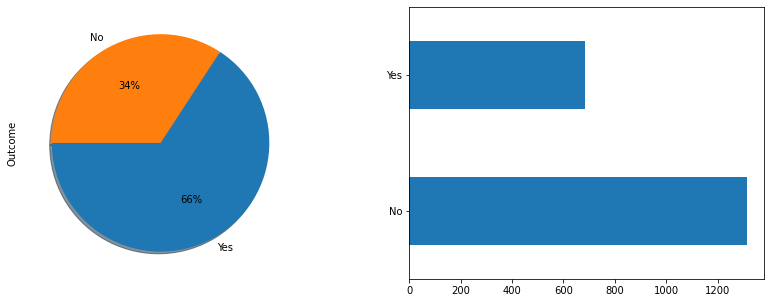

In [17]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5)
)  # sets 1 x 2 subplots with figure size of (14,5)
df.Outcome.value_counts().plot.pie(
    autopct="%.0f%%", labels=df.Outcome.unique(), shadow=True, startangle=180, ax=ax[0]
)  # plots pie chart of Outcome column with % percentage
df.Outcome.value_counts().plot.barh(
    ax=ax[1]
)  # plots bar chart of Outcome column value counts
plt.show()  # shows the plot

### Pregnancies

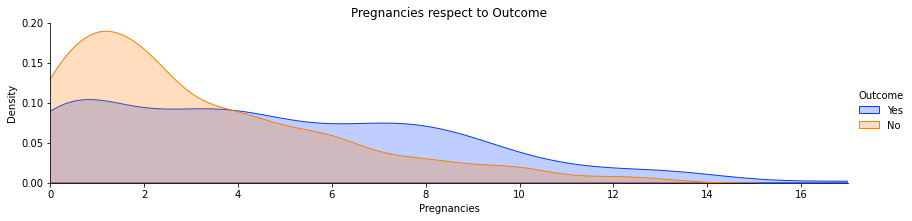

In [18]:
plot_kde("Pregnancies")

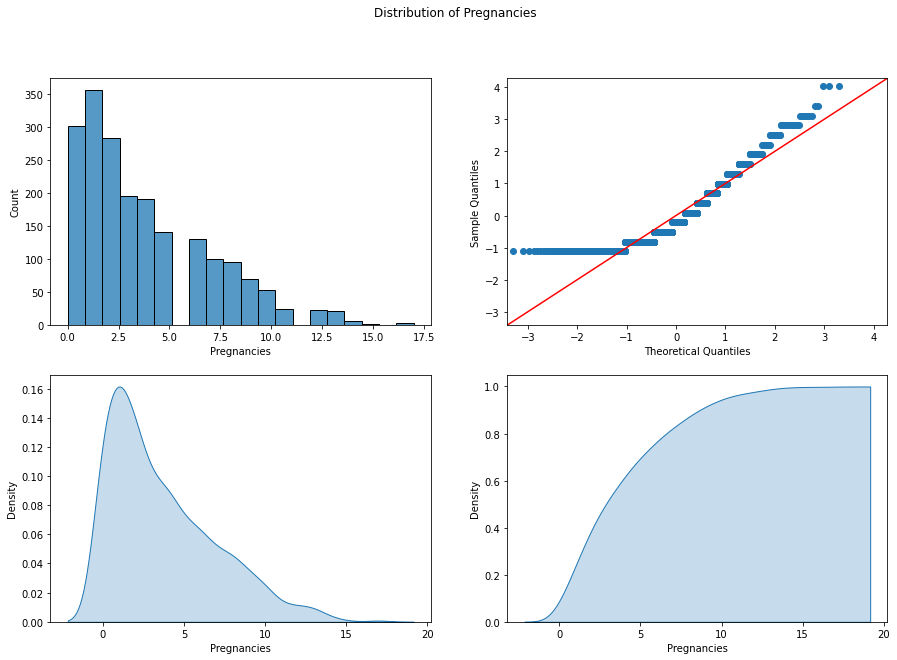

In [19]:
plot_distribution("Pregnancies")

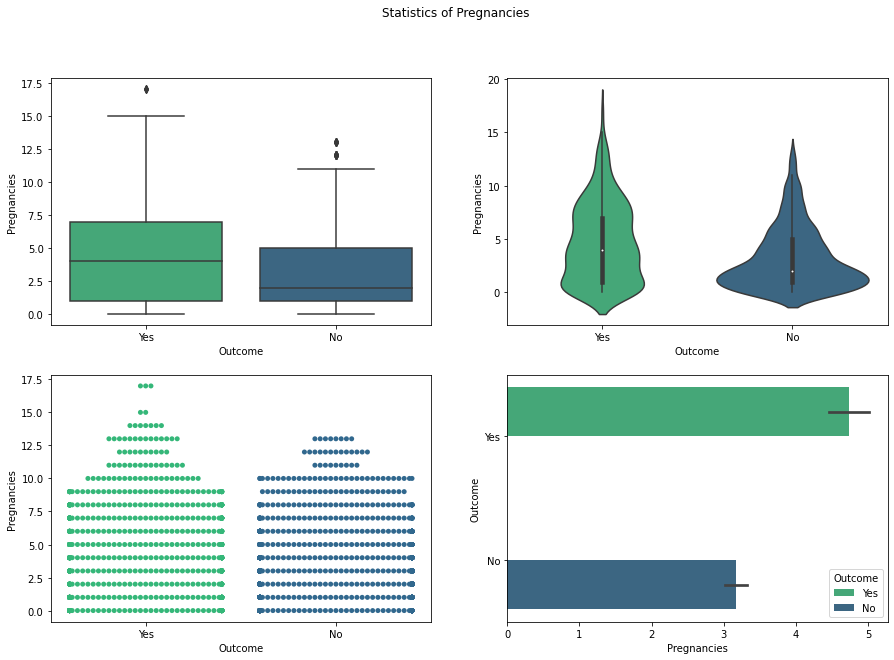

In [20]:
plot_stats("Pregnancies")

### Glucose

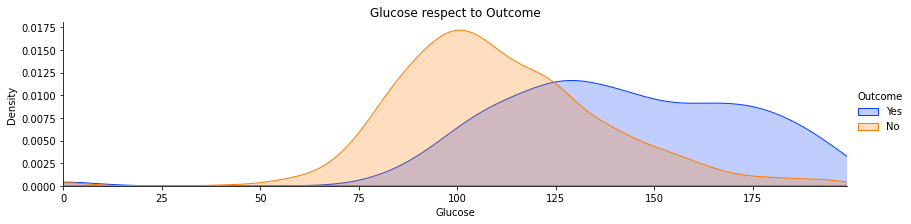

In [21]:
plot_kde("Glucose")

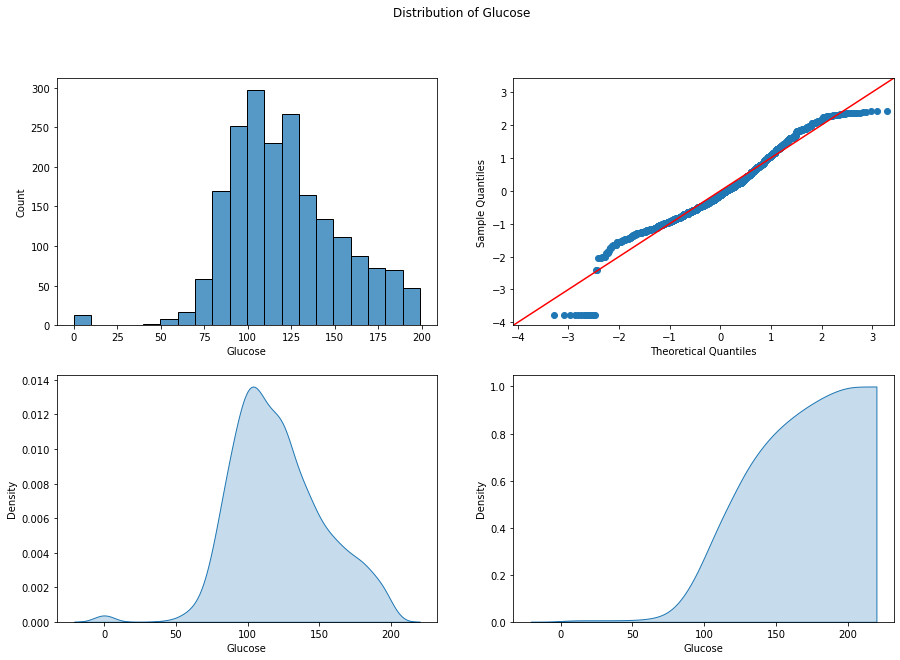

In [22]:
plot_distribution("Glucose")

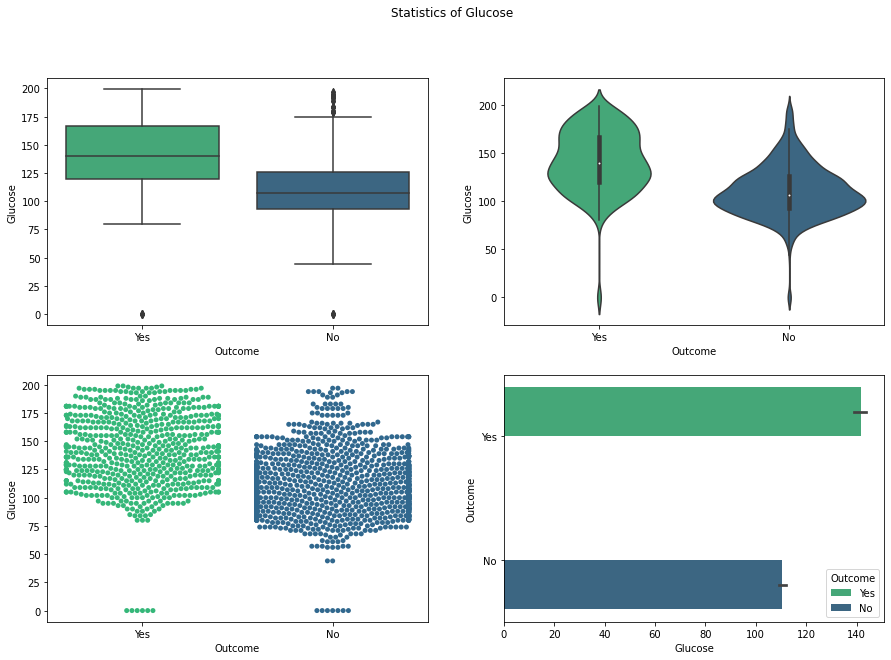

In [23]:
plot_stats("Glucose")

### BloodPressure

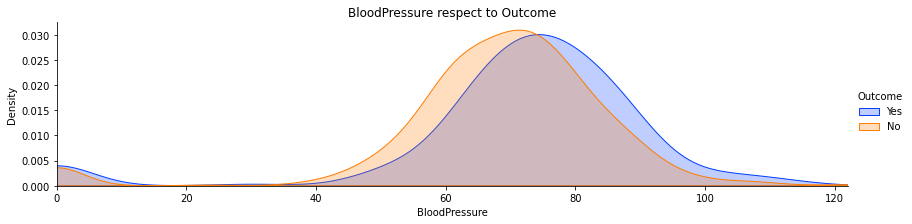

In [24]:
plot_kde("BloodPressure")

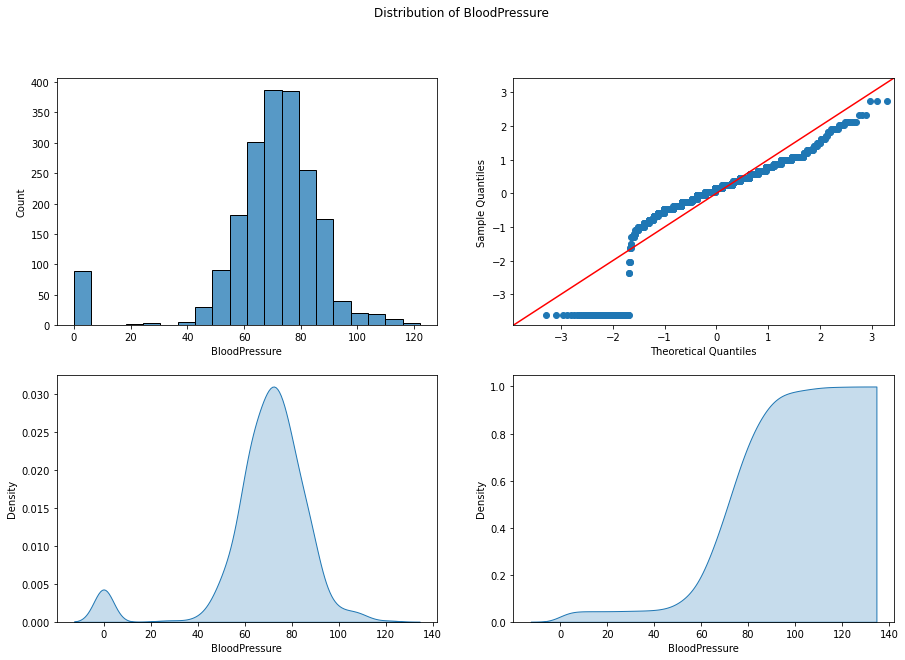

In [25]:
plot_distribution("BloodPressure")

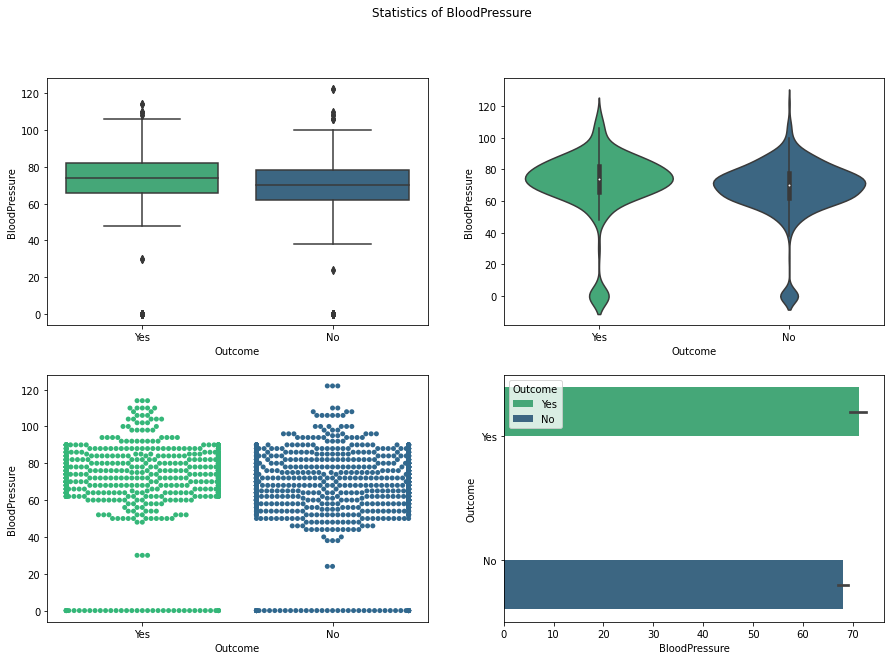

In [26]:
plot_stats("BloodPressure")

### SkinThickness

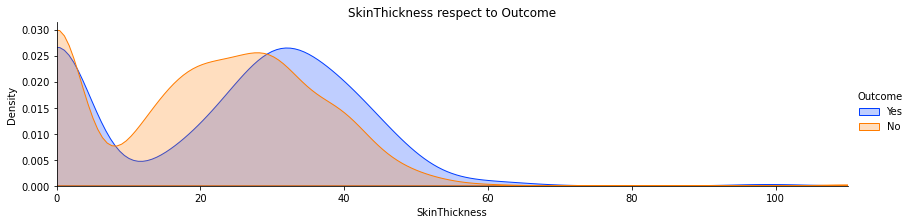

In [27]:
plot_kde("SkinThickness")

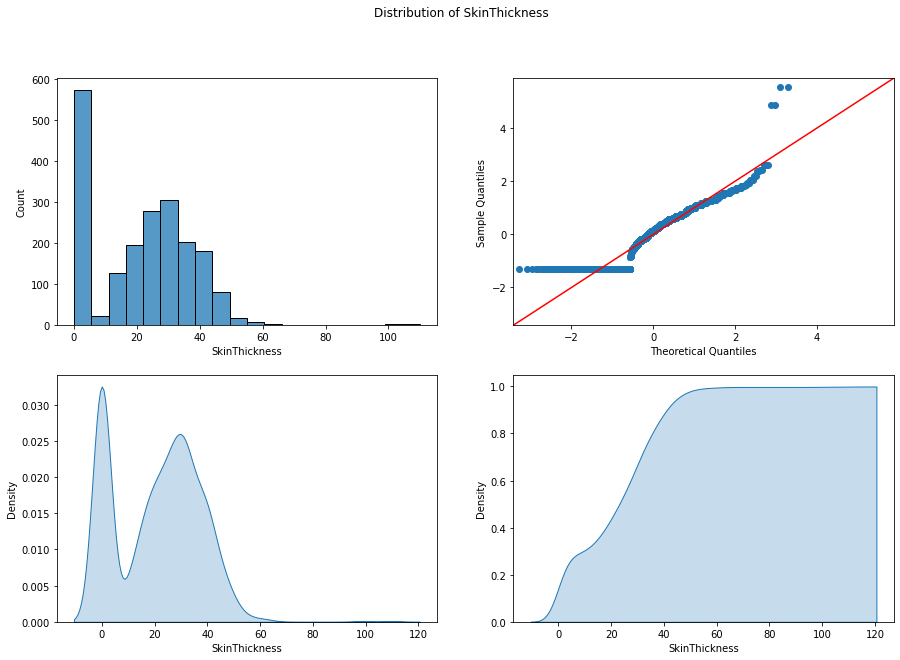

In [28]:
plot_distribution("SkinThickness")

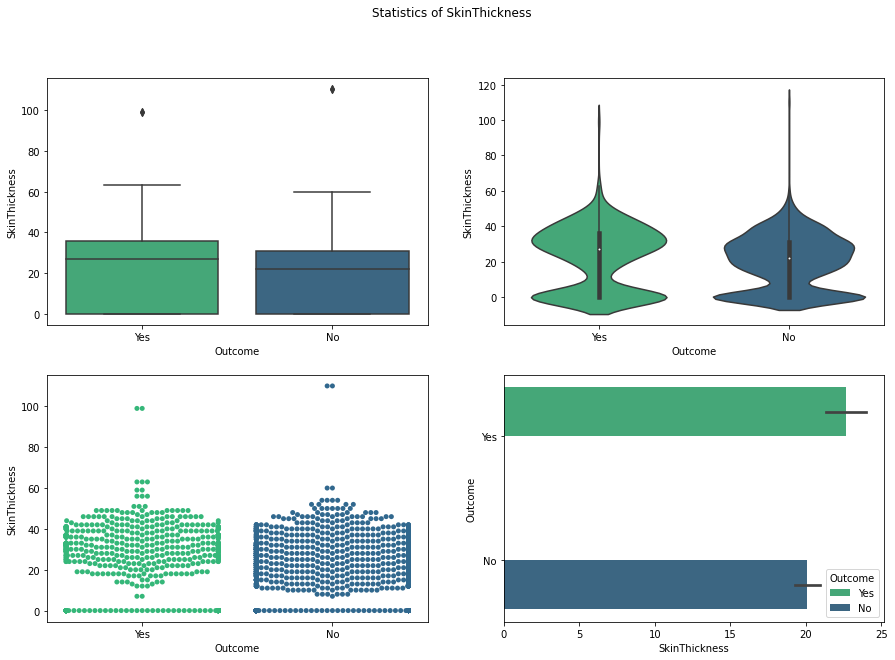

In [29]:
plot_stats("SkinThickness")

### Insulin

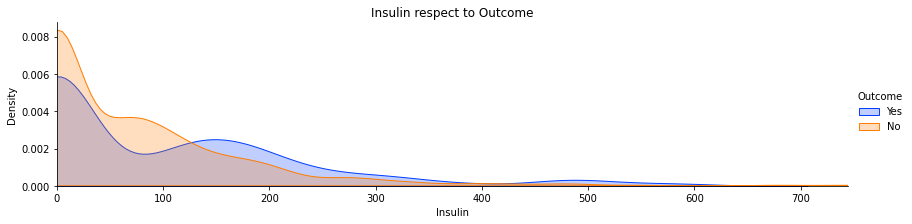

In [30]:
plot_kde("Insulin")

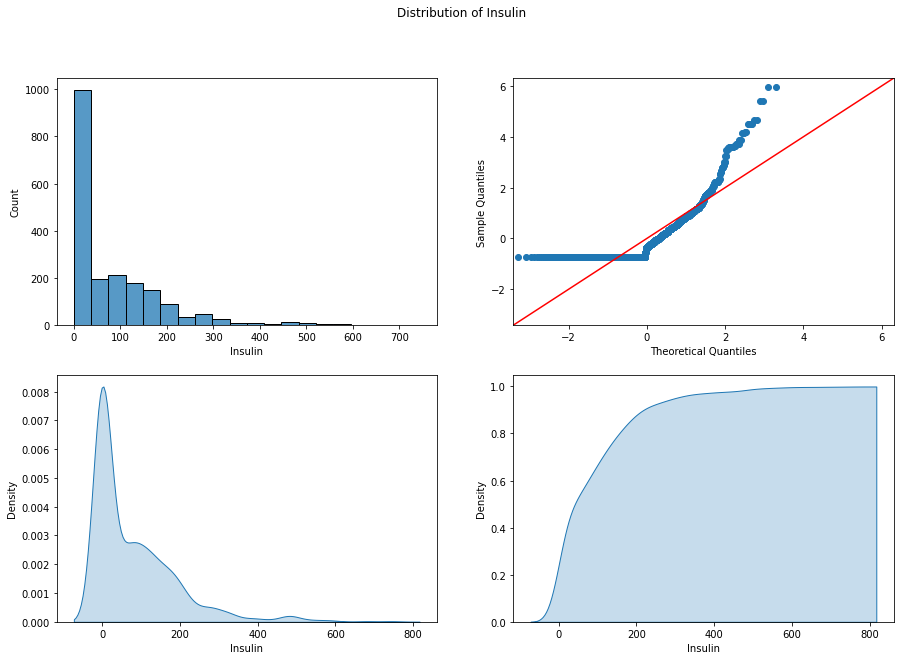

In [31]:
plot_distribution("Insulin")

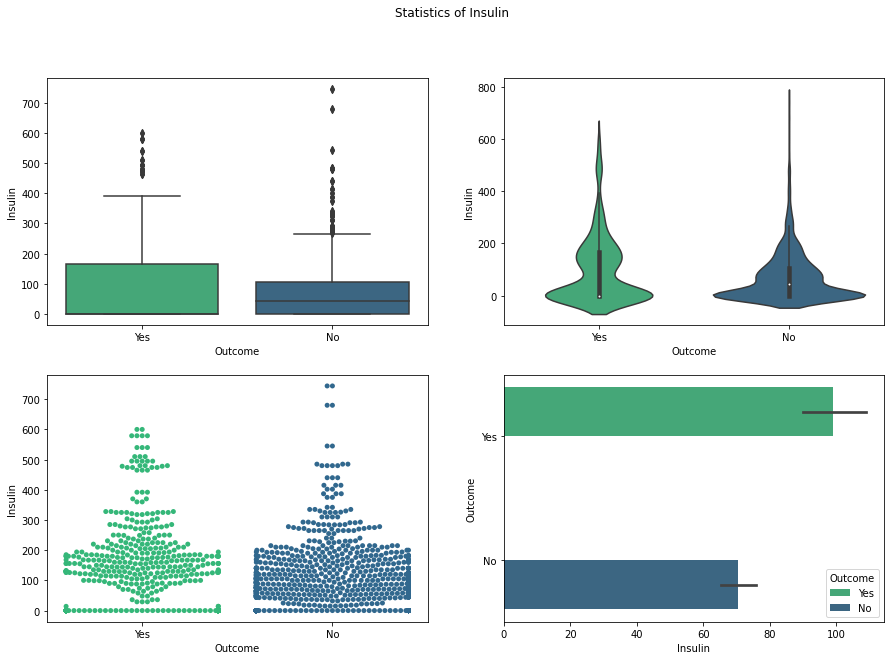

In [32]:
plot_stats("Insulin")

### BMI

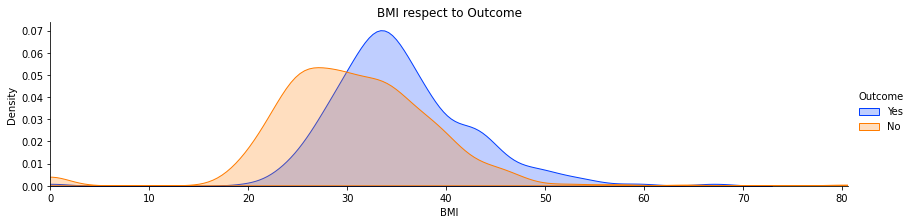

In [33]:
plot_kde("BMI")

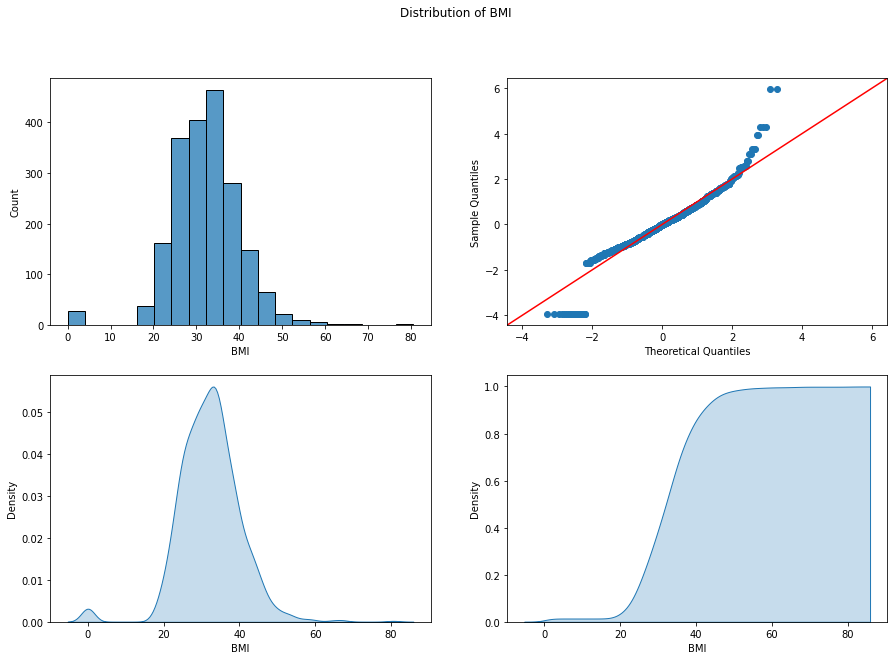

In [34]:
plot_distribution("BMI")

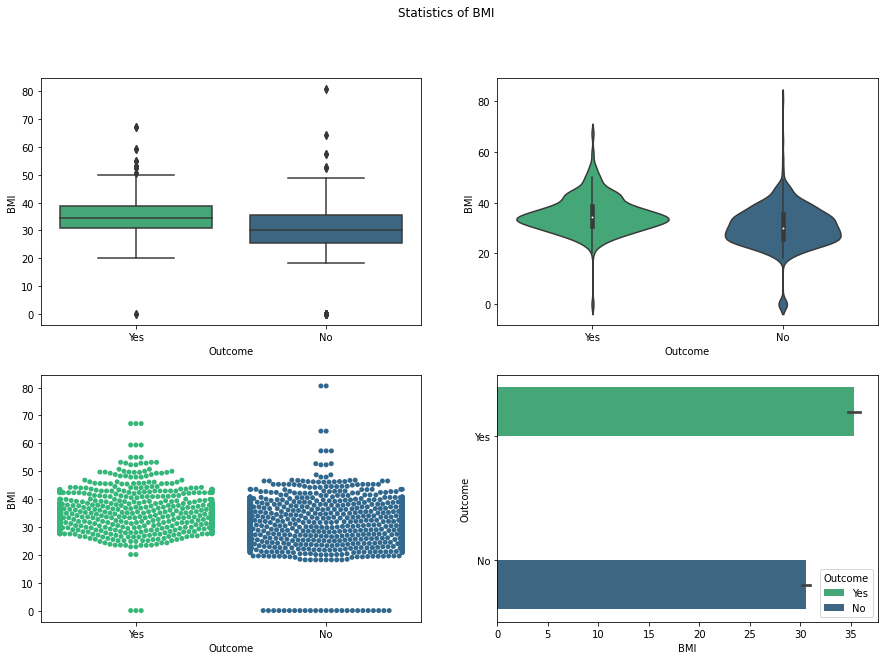

In [35]:
plot_stats("BMI")

### DPF

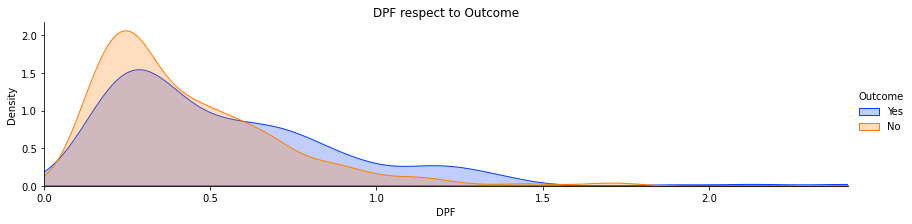

In [36]:
plot_kde("DPF")

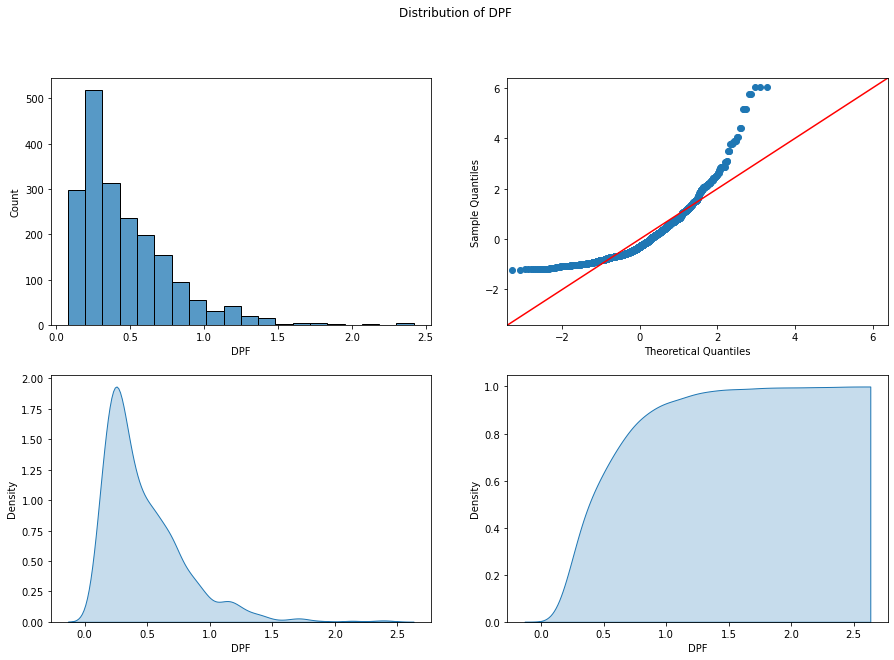

In [37]:
plot_distribution("DPF")

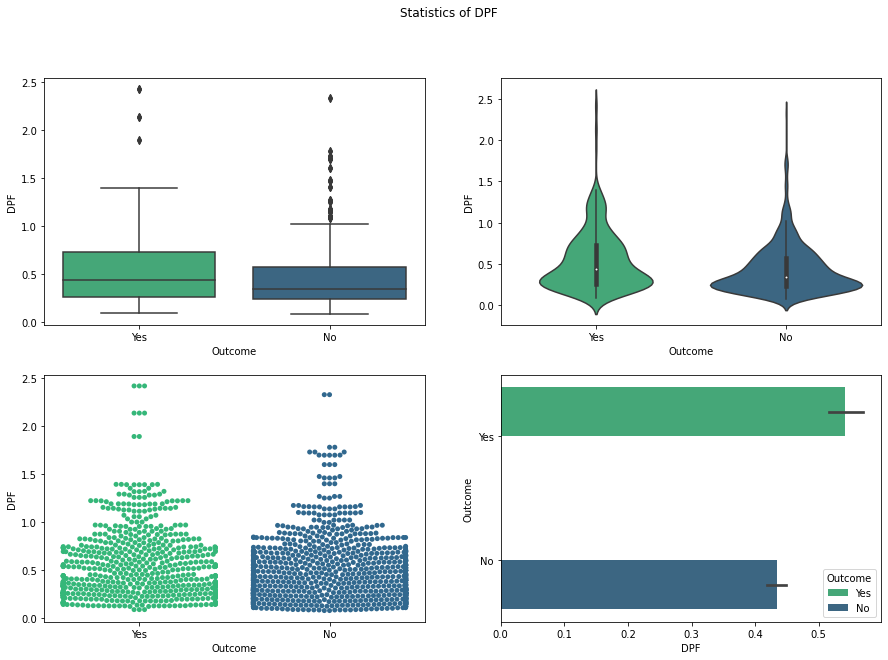

In [38]:
plot_stats("DPF")

### Age

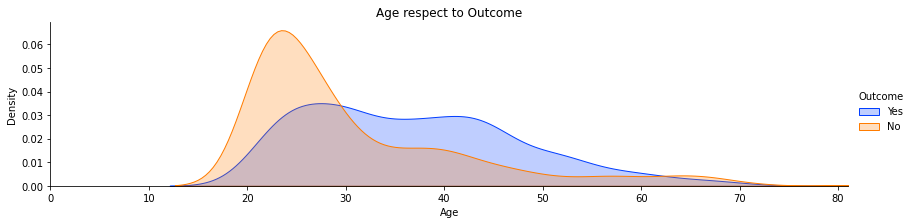

In [39]:
plot_kde("Age")

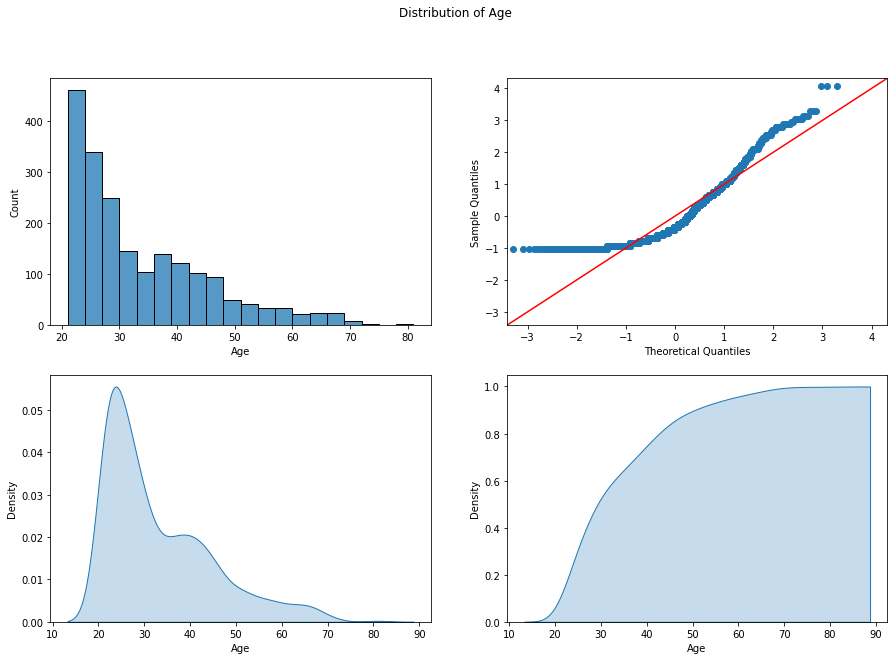

In [40]:
plot_distribution("Age")

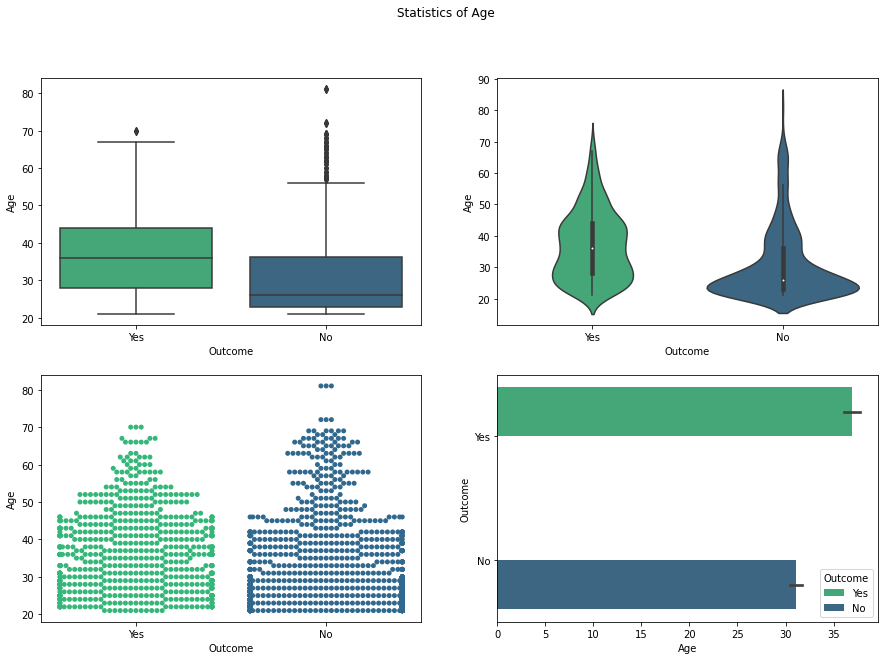

In [41]:
plot_stats("Age")

### Pair Plot

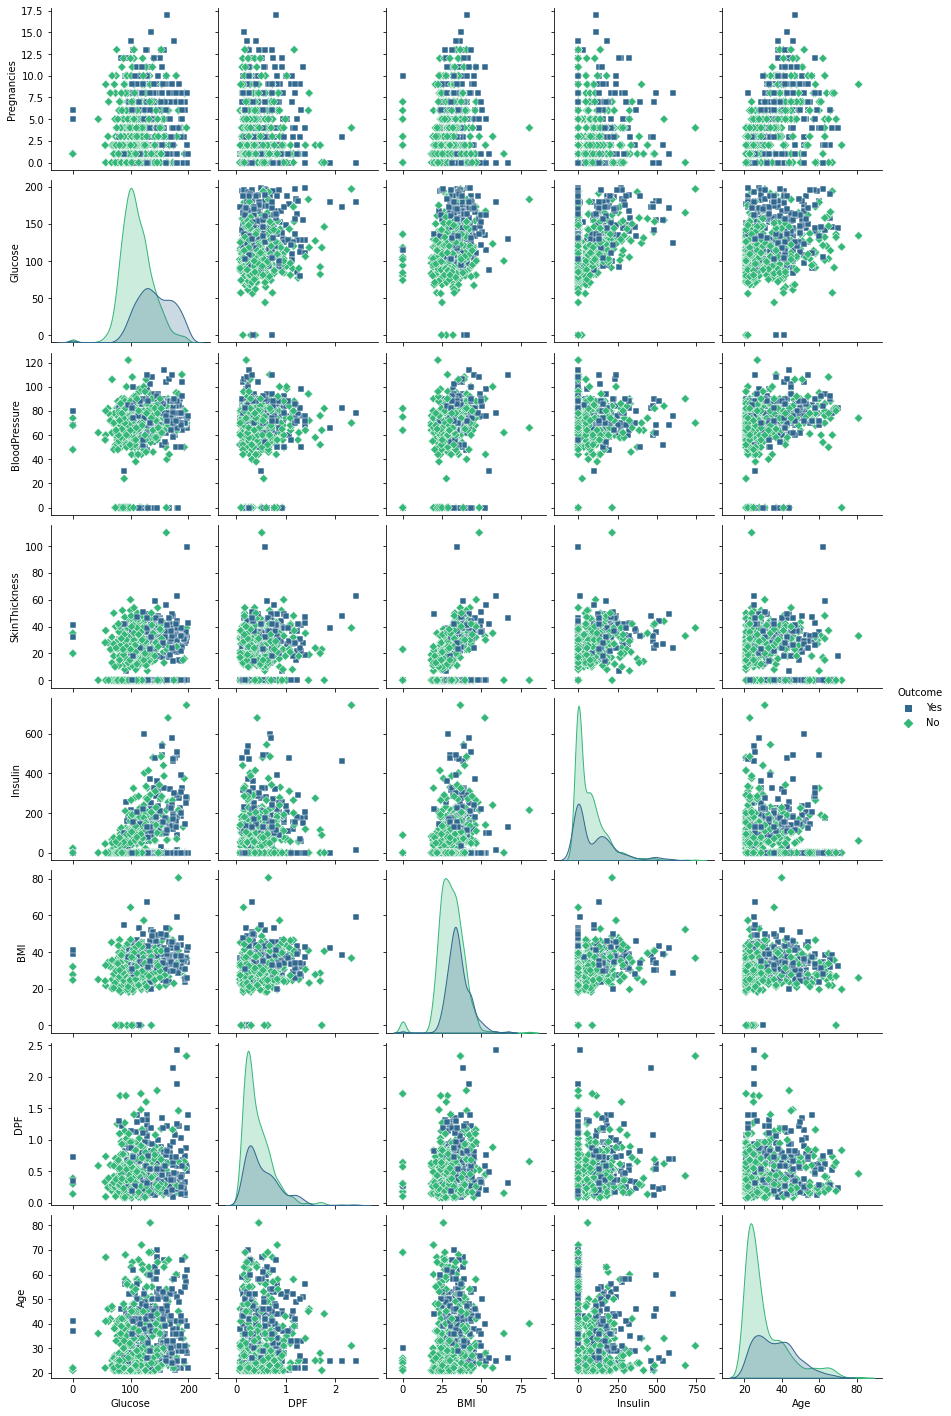

In [42]:
sns.pairplot(
    df,
    hue="Outcome",
    x_vars=["Glucose", "DPF", "BMI", "Insulin", "Age"],
    markers=["s", "D"],
    palette="viridis",
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

## Feature Engineering

In [43]:
# There are 0 values present in 'BloodPressure', 'SkinThickness', 'Insulin', 'Glucose',  'BMI' features, we have to replace it.
[
    df.loc[df[column] == 0, column].count()
    for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[573, 90, 956, 13, 28]

In [44]:
# we replace zeros with mean, median depending upon distribution
df["SkinThickness"] = np.where(
    df["SkinThickness"] == 0, df["SkinThickness"].median(), df["SkinThickness"]
)
df["BloodPressure"] = np.where(
    df["BloodPressure"] == 0, df["BloodPressure"].mean(), df["BloodPressure"]
)
df["Insulin"] = np.where(df["Insulin"] == 0, df["Insulin"].median(), df["Insulin"])
df["Glucose"] = np.where(df["Glucose"] == 0, df["Glucose"].mean(), df["Glucose"])
df["BMI"] = np.where(df["BMI"] == 0, df["BMI"].median(), df["BMI"])

# checking for any 0 values in the specified columns
[
    df.loc[df[column] == 0, column].count()
    for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[0, 0, 0, 0, 0]

In [45]:
# replacing 'No' as '0' & 'Yes' as 1
df.Outcome.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0


## Correlation

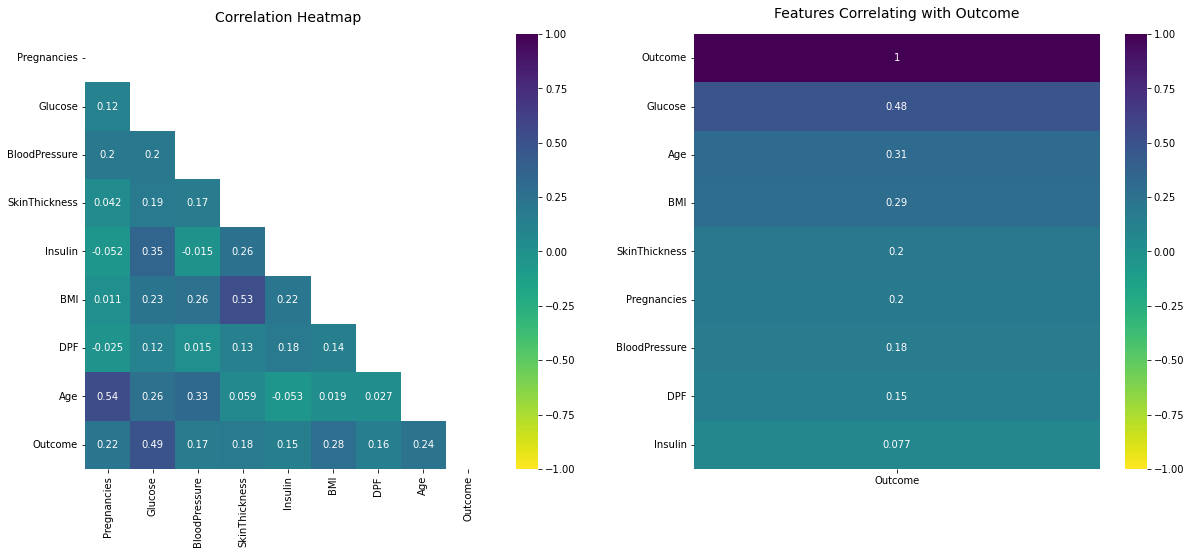

In [46]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df.corr(
    method="spearman"
)  # calculate spearman correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="viridis_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["Outcome"]].sort_values(by="Outcome", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  # create heatmap for features correlating with the dependant varibale 'Outcome'
heatmap.set_title(
    "Features Correlating with Outcome",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

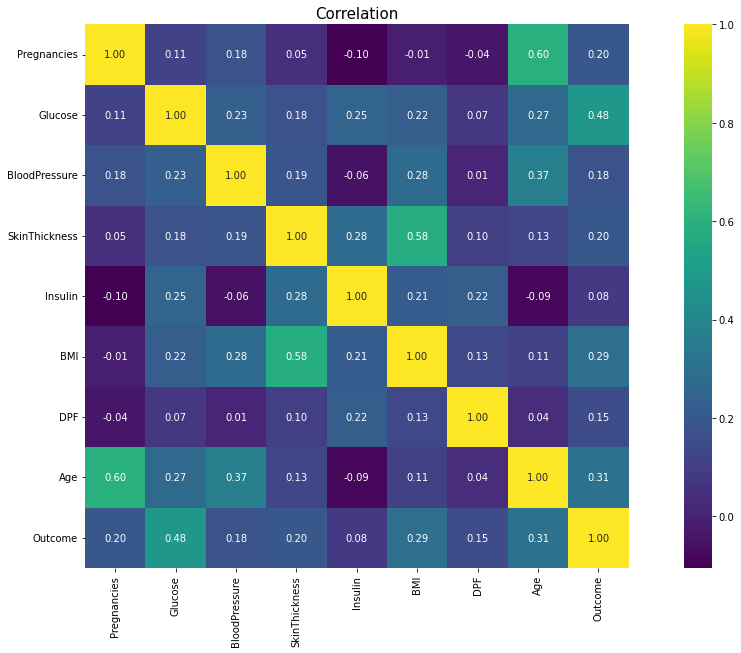

In [47]:
# create a spearman correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))
sns.heatmap(resign_corr, annot=True, fmt=".2f", square=True, cmap="viridis")
plt.title("Correlation", size=15)
plt.show()

## Data Splitting

In [48]:
X = df.drop(["Outcome"], axis=1)  # X contains all independant variables
y = df["Outcome"]  # Y contains only the dependant variable

In [49]:
X[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21


In [50]:
y[:5]

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

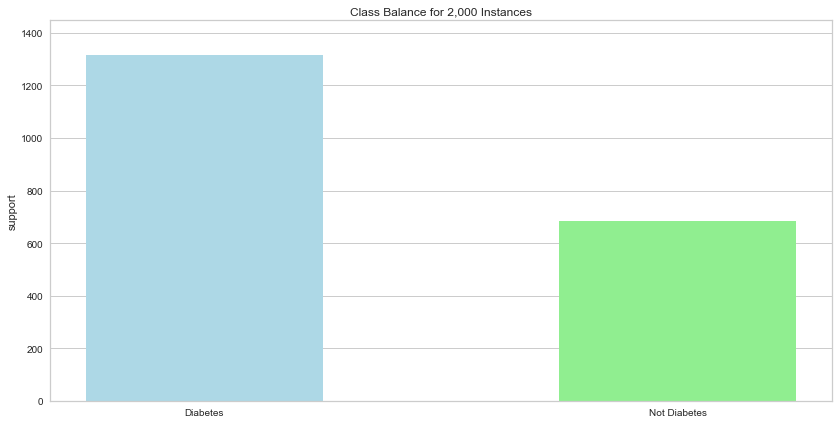

In [51]:
# Class balance between dependant column 'Outcome' values
from yellowbrick.target import ClassBalance

classes = ["Diabetes", "Not Diabetes"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

#### Sampling Imbalanced Data

In [52]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

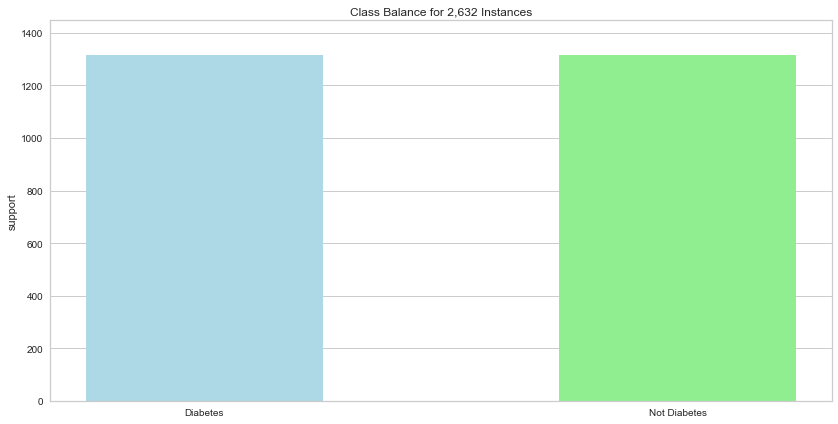

In [53]:
# Class balance between dependant variable is much more balanced now..
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

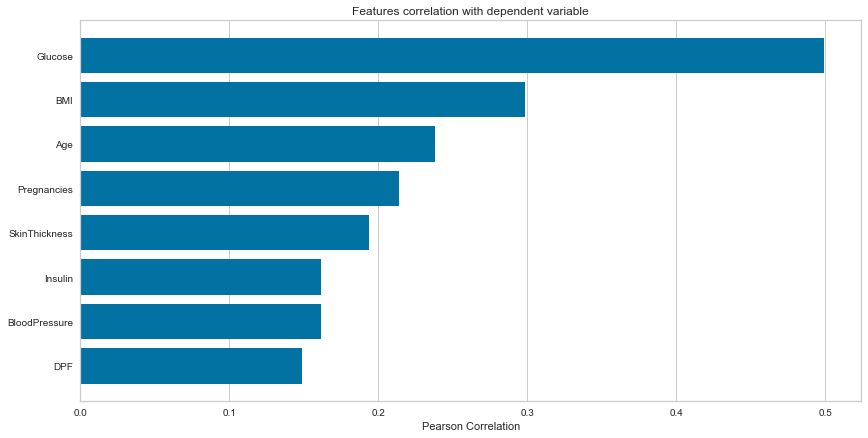

In [54]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

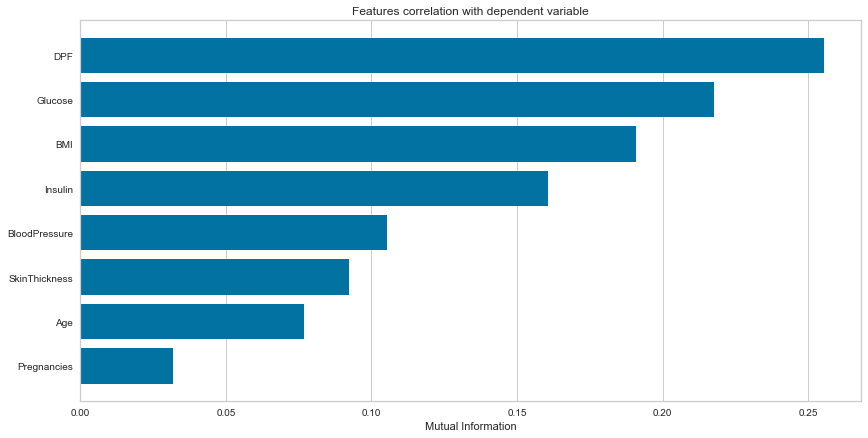

In [55]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using mutual info classification method
plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

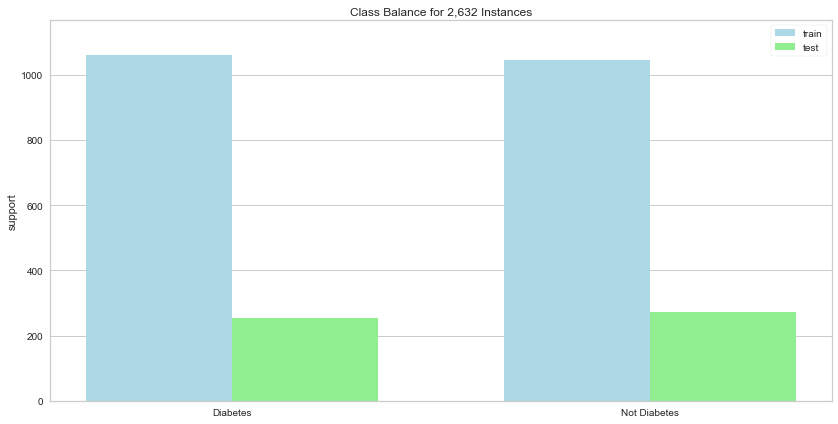

In [57]:
# displays Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

## Model Fitting

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [59]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

In [60]:
y_pred = rf_clf.predict(X_test)

**Classification Accuracy:**

In [61]:
print(accuracy_score(y_test, y_pred))

0.9715370018975332


**Classification Error:**

In [62]:
print(1 - accuracy_score(y_test, y_pred))

0.028462998102466774


**Sensitivity/True Positive Rate/Recall Score**

In [63]:
print(recall_score(y_test, y_pred))

0.9669117647058824


**Precision Score:**

In [64]:
print(precision_score(y_test, y_pred))

0.9776951672862454


**F1 Score**

In [65]:
print(f1_score(y_test, y_pred))

0.9722735674676525


**Class Prediction Error**

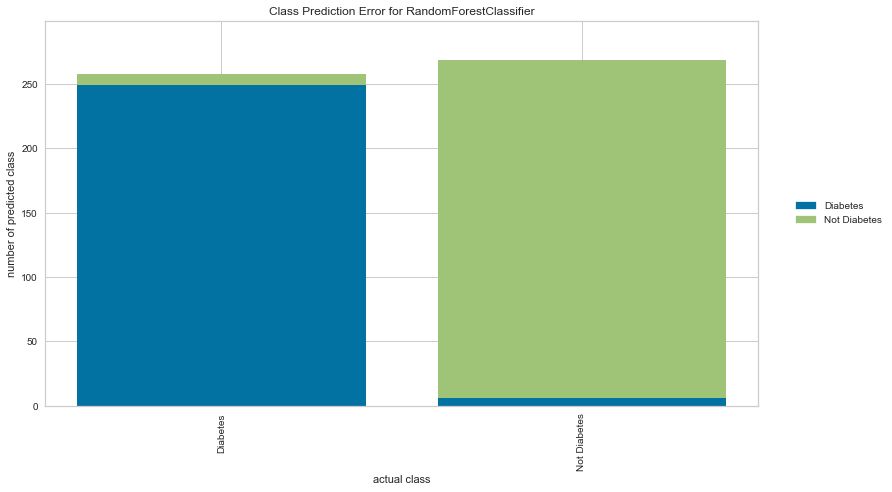

In [66]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(
    rf_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

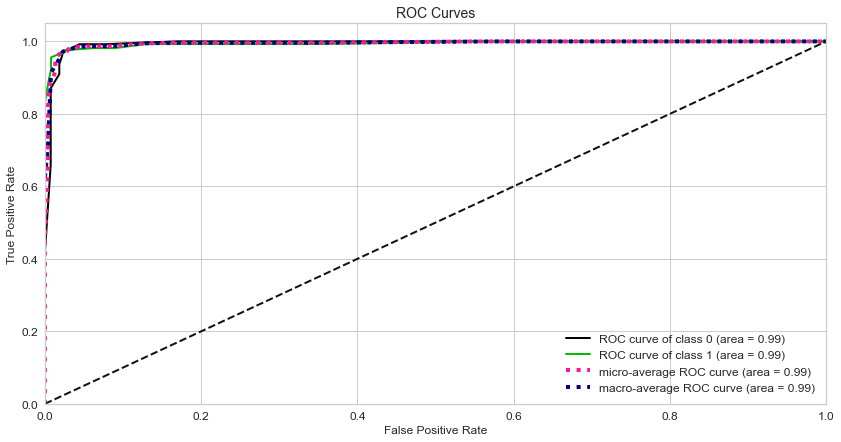

In [67]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve

y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Precision Recall Curve**

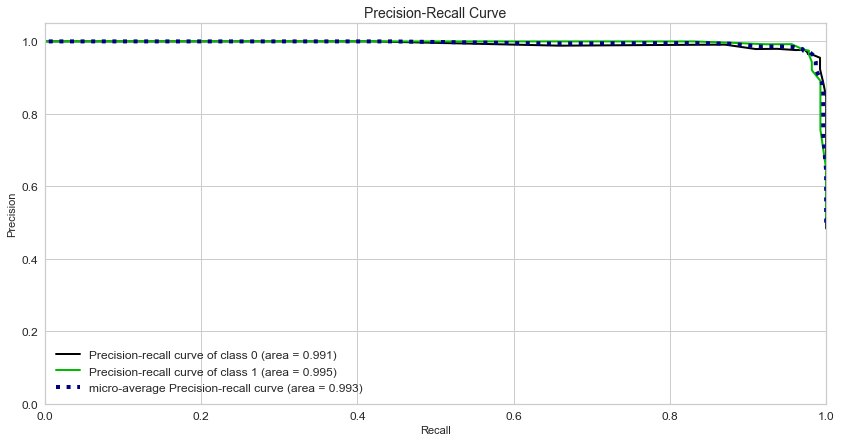

In [68]:
from scikitplot.metrics import plot_precision_recall

plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

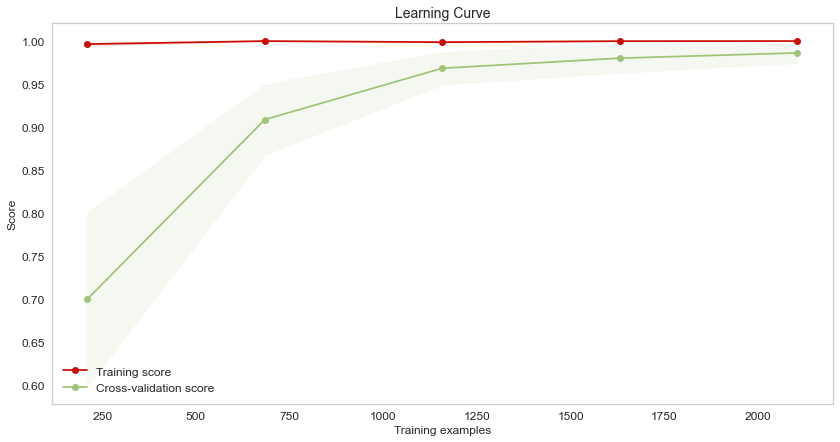

In [69]:
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Lift Curve**

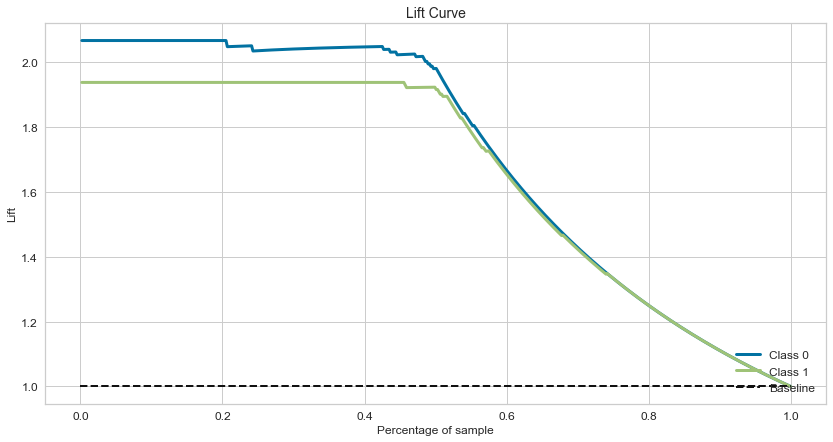

In [70]:
from scikitplot.metrics import plot_lift_curve

plot_lift_curve(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Cumulative Gains Curve**

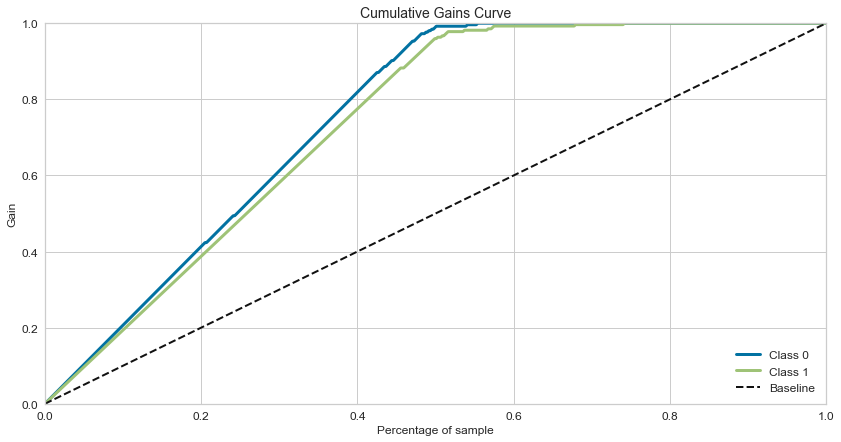

In [71]:
plot_cumulative_gain(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

In [72]:
confusion_matrix(y_test, y_pred)

array([[249,   6],
       [  9, 263]], dtype=int64)

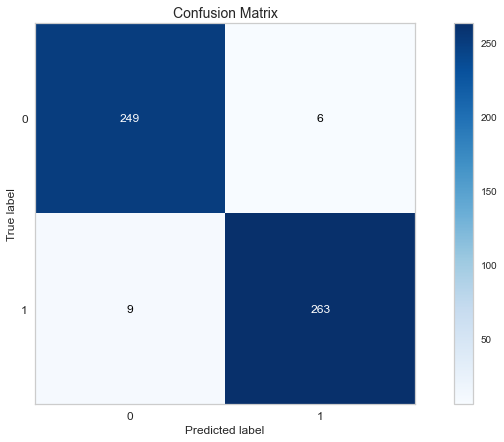

In [73]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       255
           1       0.98      0.97      0.97       272

    accuracy                           0.97       527
   macro avg       0.97      0.97      0.97       527
weighted avg       0.97      0.97      0.97       527



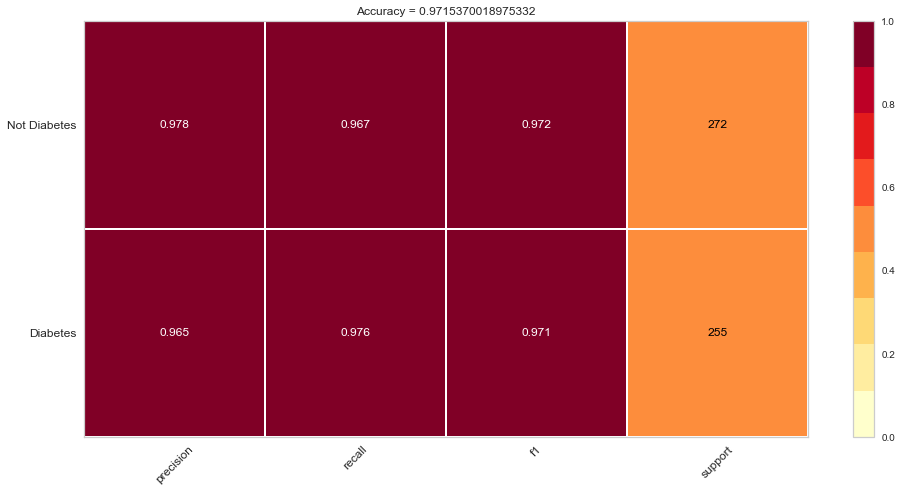

In [75]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}"
)
plt.show()

### Predictions

In [76]:
# function to predict using the trained model
def predict_diabetes(
    Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]

    return rf_clf.predict(x)

In [77]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Great! You don't have diabetes.


In [78]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Oops! You have diabetes.


In [79]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Great! You don't have diabetes.


### Saving the Model

In [80]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
